In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.transforms as mtrans

In [2]:
ratings = pd.read_csv("backups/23_july_2019.csv")

In [3]:
sessions = ratings.groupby(["SeshID", "StimID"]).first().drop(["RateID", "PollSec", "SliceStartSec", "ReactionTime", "Ratings"], axis = 1)

In [4]:
stimCounts = sessions.groupby("StimName").count().rename(columns = {"ParticipantID": "Participants"}).sort_values("StimName")
stimCounts

,Participants
StimName,
BestOfTimes.mp4,272
CopsDontCry.mp4,253
FindingHome.mp4,253
GMarksTheSpot.mp4,288
Mortified.mp4,255
StrangerBonding.mp4,261
ThisIsGoingToSuck.mp4,255
UnexpectedTwist.mp4,261


In [5]:
stimCounts.mean()

Participants    262.25
dtype: float64

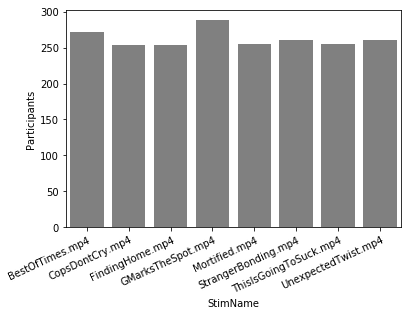

In [6]:
stimPlot = sns.barplot(data = stimCounts.reset_index(), x = "StimName", y = "Participants", color = "gray")
trans = mtrans.Affine2D().translate(5, 0)
for item in stimPlot.get_xticklabels():
    item.set_ha("right")
    item.set_rotation(25)
    item.set_transform(item.get_transform()+trans)

In [7]:
participantCounts = sessions.groupby("ParticipantID").count().rename(columns = {"StimName": "StimsRated"})

In [8]:
participantCounts.mean()

StimsRated    1.782498
dtype: float64

In [9]:
participantCounts.reset_index().groupby("StimsRated").count().rename(columns = {"ParticipantID": "Participants"})

,Participants
StimsRated,
1,613
2,291
3,215
4,40
5,12
6,4
7,2


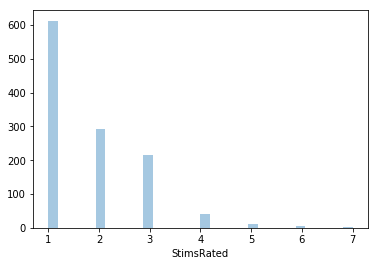

In [10]:
sns.distplot(a = participantCounts["StimsRated"], kde = False)

In [20]:
participantCounts[(participantCounts["StimsRated"] > 2) & (participantCounts["StimsRated"] < 7)].sample(25).index

Index(['A2HNSMIG9KZYAE', 'A1TZCSZA0IQ6JB', 'A1XVEKS9O73ERE', 'A2AJX9RMXPP9PW',
       'A3RLDROGYUMEVZ', 'AT3C00TKZK13L', 'A1BNR1ZAF1QGWG', 'A1ZT30BGR3266K',
       'A2ZIATVCA2NKPF', 'A273DS7TQWR9M1', 'AUFUUD4WG9CVO', 'A3W6T1WDYXMR3',
       'A2C0VTQOFYUP83', 'A2NGMLBFZ3YQP5', 'A2DVV59R1CQU6T', 'ALQPGVQZEZSUE',
       'A3H32595TVJ34Q', 'A1D2K63U3LCO3F', 'A2O6G24WCC6I59', 'A1YSYI926BBOHW',
       'A1TARNH07A75CG', 'A22ABLVEI5EGPL', 'A1BHR5XQ16T7LA', 'A2SKXKH9YXZYRI',
       'A2OFWHV8IP7HK'],
      dtype='object', name='ParticipantID')